In [1]:
# First, let's download the data if it is not there:
import os.path as path

def download(url: str):
    file_name = url.split('/')[-1]
    if not path.exists(f'./{file_name}'): 
        import requests
        with open(file_name, 'wb') as file:
            req = requests.get(url,  allow_redirects=True)
            file.write(req.content)
            print(f'Sucessfully downloaded {file_name}')
    return file_name

data_file = download('http://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data')
#download('http://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names')
None

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection

In [3]:
data = pd.read_csv(data_file, names=[
                                "fLength",
                                "fWidth",
                                "fSize",
                                "fConc",
                                "fConc1",
                                "fAsym",
                                "fM3Long",
                                "fM3Trans",
                                "fAlpha",
                                "fDist",
                                "class",])

In [4]:
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [5]:
# normalize the data 
data_normed = data.copy()
for key in data:
    if data_normed[key].dtype == 'float64':
        data_normed[key] = (data_normed[key]-data_normed[key].mean())/data_normed[key].std()

data_normed['class'] = data_normed['class'].map(lambda x: 1 if x=='h' else 0)
        
data_normed.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,1.902000e+04,19020.000000
mean,7.172671e-17,-1.434534e-16,-2.151801e-16,-3.018499e-16,1.094580e-16,-1.195445e-17,3.586336e-17,-8.218686e-18,3.586336e-17,-5.977226e-18,0.351630
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.477492
min,-1.155832e+00,-1.209032e+00,-1.869910e+00,-2.008756e+00,-1.939694e+00,-7.661113e+00,-6.712250e+00,-9.897733e+00,-1.059076e+00,-2.576353e+00,0.000000
25%,-6.825033e-01,-5.623643e-01,-7.361785e-01,-7.905726e-01,-7.798526e-01,-2.745463e-01,-4.585934e-01,-5.329076e-01,-8.465409e-01,-6.867998e-01,0.000000
50%,-3.800899e-01,-2.747766e-01,-1.807389e-01,-1.431903e-01,-1.643019e-01,1.409449e-01,9.350087e-02,1.999641e-02,-3.817940e-01,-2.631513e-02,0.000000
75%,3.982551e-01,1.394582e-01,5.852387e-01,6.748581e-01,6.385608e-01,4.796037e-01,4.959254e-01,5.135869e-01,6.986710e-01,6.255143e-01,1.000000
max,6.631130e+00,1.276574e+01,5.286268e+00,2.804355e+00,4.167401e+00,9.789073e+00,4.466175e+00,8.623301e+00,2.388722e+00,4.037679e+00,1.000000


In [6]:
# Since the data is ordered by class, better shuffle the data
# Lets prepare the training data!
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_normed.drop('class', axis=1), data_normed['class'], random_state=42)
data_train = X_train.copy()
data_train['class'] = y_train
data_train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
1583,-0.380121,-0.030550,1.112113,-0.711804,-0.769673,0.120053,0.345294,-0.634155,-0.993759,-1.547248,0
1520,-0.035042,0.465579,1.593282,-1.204657,-1.154250,0.719121,0.566312,0.677250,-0.767235,0.046031,0
5453,-0.468748,-0.615776,-0.711845,0.423782,0.364153,0.237840,-0.537174,0.476212,-0.901396,-1.017145,0
1617,-0.764810,-0.667842,-1.077060,1.222959,1.357721,0.119284,-0.496472,-0.380586,1.463632,-2.250254,0
491,-0.652689,-0.526029,-0.273206,0.651884,1.037391,0.194950,-0.584490,-0.487949,-0.723816,0.292900,0
...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.503459,-0.295119,-0.356364,0.018450,0.182271,0.137200,0.205322,0.152956,-0.942425,0.743418,0
11964,-0.231238,-0.246749,0.362851,-0.646710,-0.652037,-0.137710,-0.663368,-0.557266,-0.819235,-0.121622,0
5390,-0.785027,-0.550220,-0.824414,1.051199,1.660859,0.345788,0.113301,0.441133,-0.569799,0.001003,0
860,-0.514968,0.059094,0.230604,-0.462916,-0.388714,-0.081006,0.182475,0.914158,2.004063,-2.282586,0


In [7]:
X_train.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000
mean,0.002337,0.001966,0.002933,0.000517,0.001030,0.001211,0.003450,-0.004449,-0.001935,0.004758
std,1.000666,0.997288,1.000851,1.004294,1.004660,1.000368,0.999569,1.000363,1.000932,1.002202
min,-1.155832,-1.209032,-1.869910,-2.008756,-1.935170,-7.661113,-6.712250,-9.897733,-1.059076,-2.576353
25%,-0.681245,-0.563111,-0.737660,-0.796043,-0.784151,-0.276927,-0.459410,-0.535895,-0.846653,-0.679283
50%,-0.380246,-0.271675,-0.179046,-0.140729,-0.159777,0.139000,0.093058,0.035995,-0.388517,-0.018533
75%,0.403987,0.146949,0.598358,0.672123,0.640144,0.481070,0.501174,0.513451,0.697845,0.627805
max,6.631130,12.765743,4.981993,2.804355,4.167401,9.789073,4.466175,8.623301,2.388722,4.037679


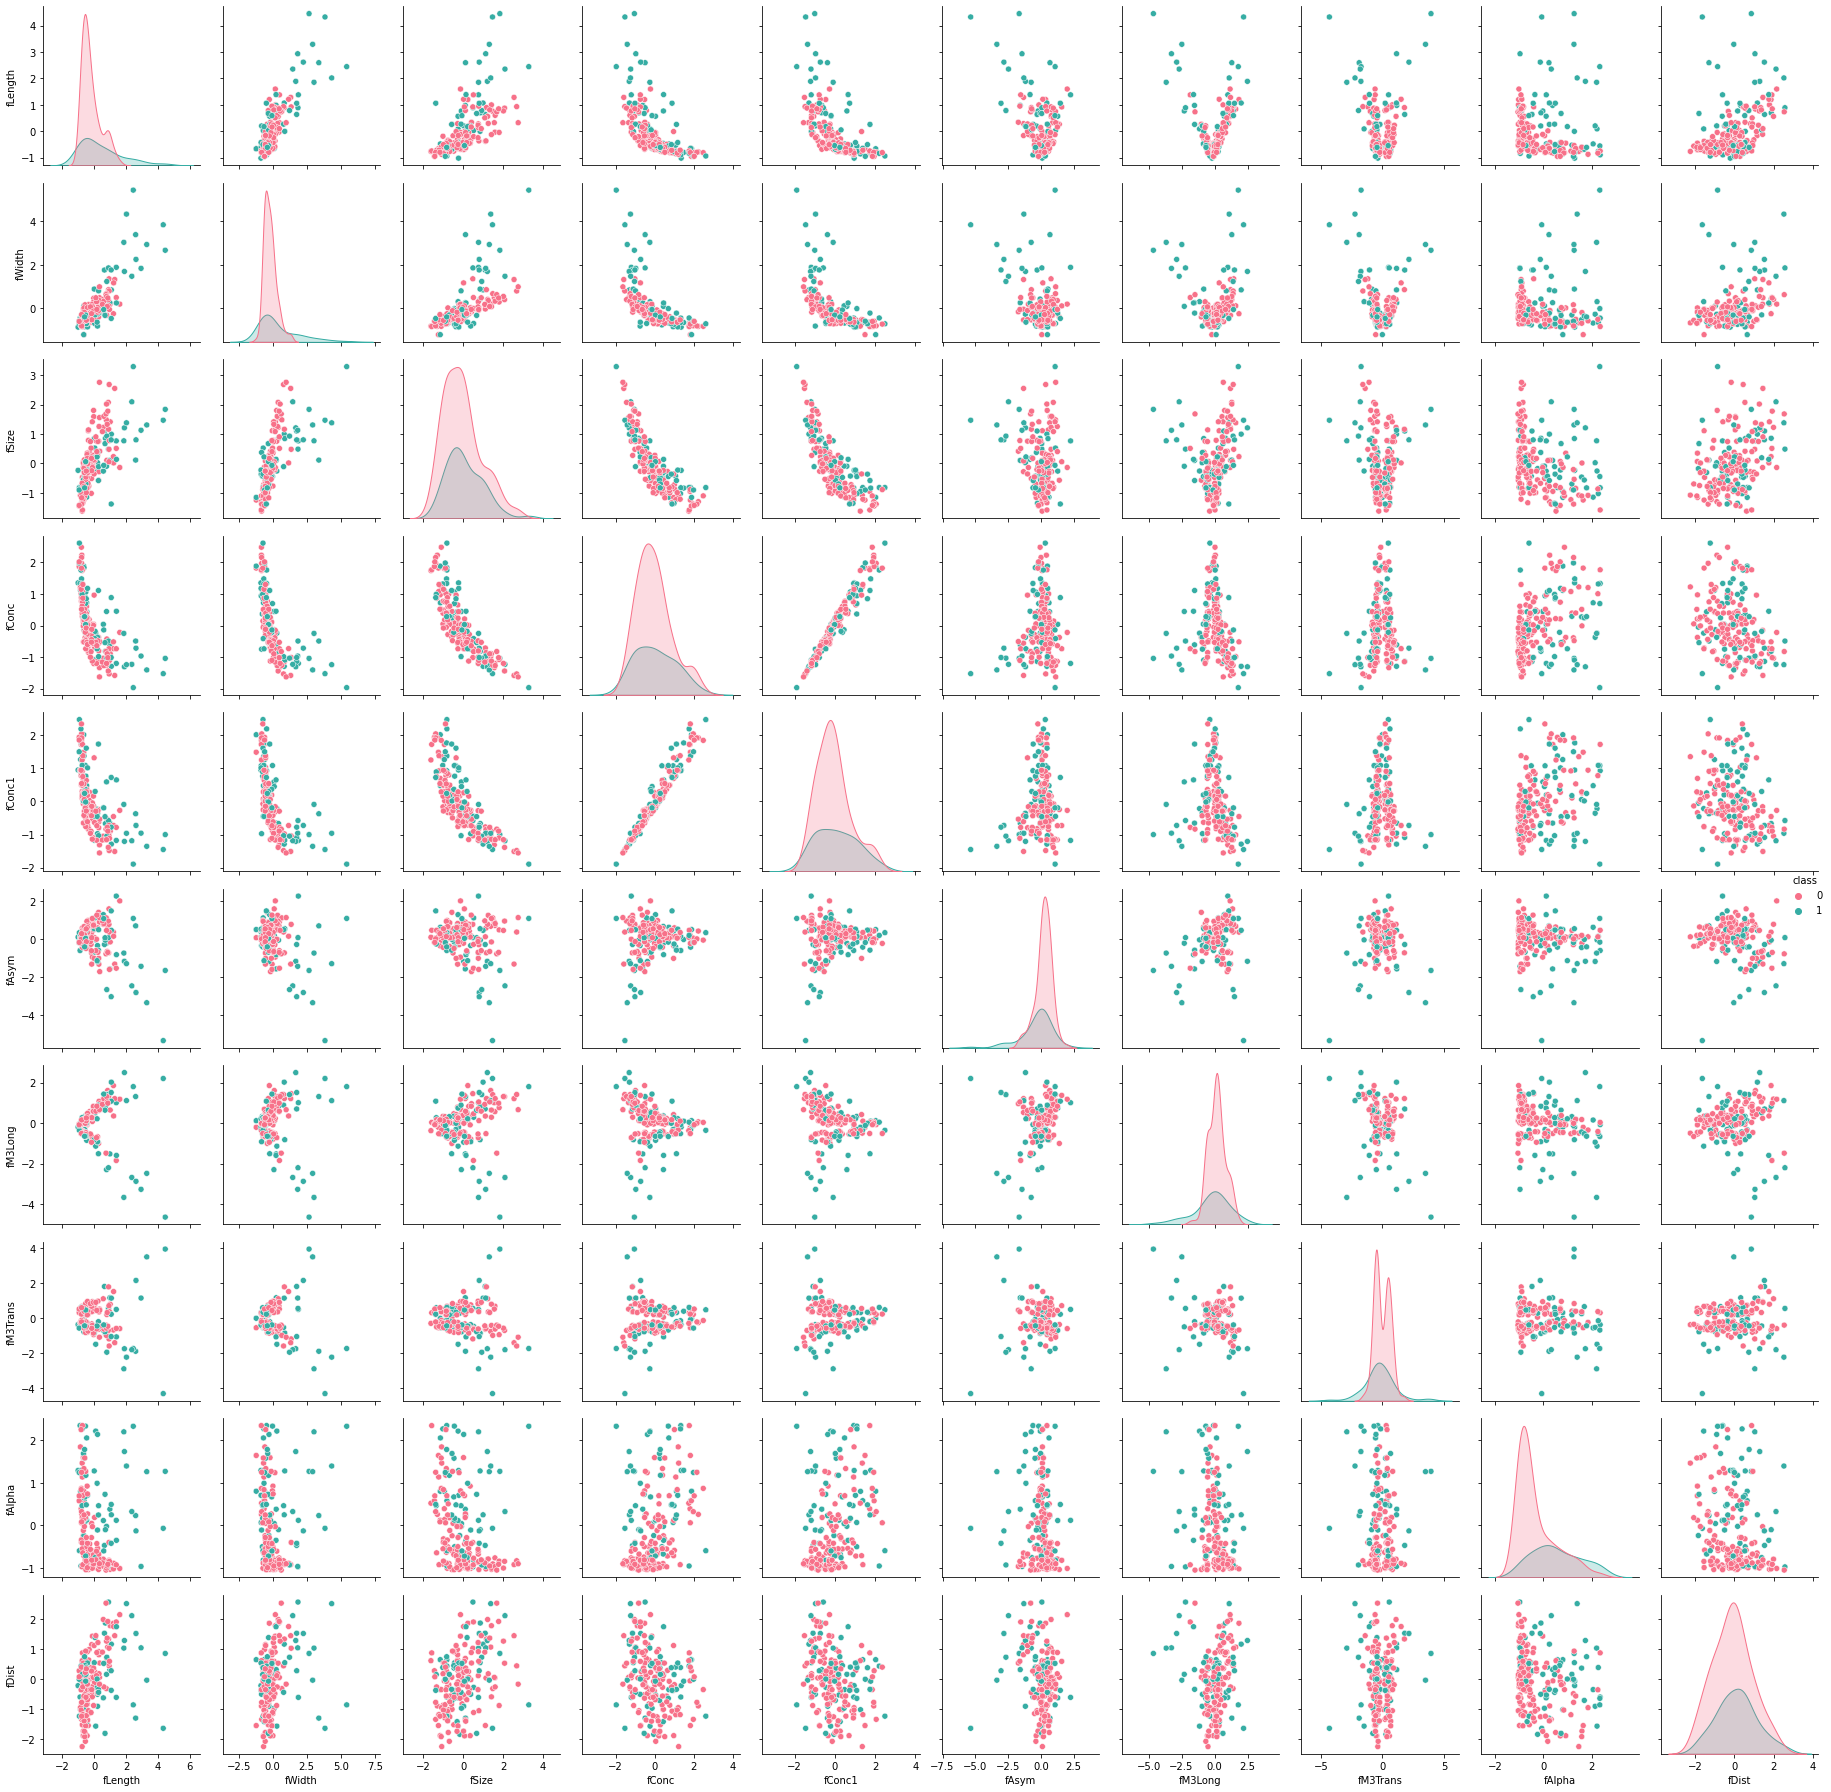

In [8]:
# a probably confusing look at the data
sns.pairplot(data=data_train.head(200),
             palette="husl",
             hue='class')

plt.tight_layout()
plt.show()   # pairplot without standard deviaton fields of data

<AxesSubplot:>

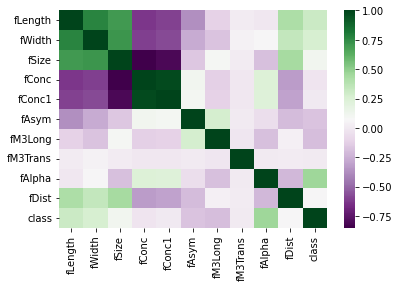

In [9]:
data_train.corr()
# DataViz101: use a divergent colormap here!
sns.heatmap(data_normed.corr(), cmap='PRGn')

Some features seem to be highly correlated, maybe a PCA can help reduce number of input features.

Okay, lets test some ML algorithms! Start with simple ones and grow more complex

In [10]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
models = [Perceptron, LogisticRegression, GaussianNB, RandomForestClassifier, AdaBoostClassifier, 
          MLPClassifier, GradientBoostingClassifier, SVC]

In [11]:
# Use cross validation to tune the meta-parameters, without manual-overfitting to the test data!
# test all the models with base setting, to determine which models to investigate more
for model in models:
    clf = model()
    scores = model_selection.cross_val_score(clf, X_train, y_train, scoring='accuracy', n_jobs=-1)
    print(f"Accuracy for {model.__name__} is: {np.mean(scores):.2f}±{np.std(scores):.2f}")

Accuracy for Perceptron is: 0.72±0.02
Accuracy for LogisticRegression is: 0.79±0.01
Accuracy for GaussianNB is: 0.73±0.01
Accuracy for RandomForestClassifier is: 0.88±0.01
Accuracy for AdaBoostClassifier is: 0.84±0.00


/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Sto

Accuracy for MLPClassifier is: 0.87±0.00
Accuracy for GradientBoostingClassifier is: 0.87±0.00
Accuracy for SVC is: 0.87±0.00


This needs some comments: All the meta-parameters are unoptimized as of now, so the comparission is not really fair. But we get some Idea: not linear models seem to approximate the data better, which makes sense. 
Note that sklearns NN implementation is very very basic compared to something like tensorflow. We will for sure be able to outperform this NN. 
Interestingly SVC performs very good, this teaches us something: The standartd SVC uses a radial kernel function, but is otherwise (except regularization), a linear predictor.
So transforming the data to polar coordinates may bring some benefits.

In [12]:
import itertools
def grid(**kwargs):
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))

In [13]:
# Lets first work on the hyperparameters of the SVC classifier:
for params in grid(C=[0.5, 1, 2], kernel=['rbf', 'linear']):
    clf = SVC(**params)
    scores = model_selection.cross_val_score(clf, X_train, y_train, scoring='accuracy', n_jobs=-1)
    print(f"Accuracy for {params} is: {np.mean(scores):.2f}±{np.std(scores):.2f}")

Accuracy for {'C': 0.5, 'kernel': 'rbf'} is: 0.87±0.00
Accuracy for {'C': 0.5, 'kernel': 'linear'} is: 0.79±0.01
Accuracy for {'C': 1, 'kernel': 'rbf'} is: 0.87±0.00
Accuracy for {'C': 1, 'kernel': 'linear'} is: 0.79±0.01
Accuracy for {'C': 2, 'kernel': 'rbf'} is: 0.87±0.00
Accuracy for {'C': 2, 'kernel': 'linear'} is: 0.79±0.01


With SVC there is not really much to gain, without working on the input data. The model has very few hyperparameters, of which the kernel is the most important one, the radial rbf kernel is the best perfroming and the one which makes this model so interesting.

In [14]:
# Now the random forest. After that we will leave sklearn classifiers, to look at more powerful ones
for params in grid(n_estimators=[80, 100, 120], min_samples_split=[16], criterion=['gini', 'entropy']):
    clf = RandomForestClassifier(**params)
    scores = model_selection.cross_val_score(clf, X_train, y_train, scoring='accuracy', n_jobs=-1)
    print(f"Accuracy for {params} is: {np.mean(scores):.2f}±{np.std(scores):.2f}")

Accuracy for {'n_estimators': 80, 'min_samples_split': 16, 'criterion': 'gini'} is: 0.88±0.00
Accuracy for {'n_estimators': 80, 'min_samples_split': 16, 'criterion': 'entropy'} is: 0.88±0.00
Accuracy for {'n_estimators': 100, 'min_samples_split': 16, 'criterion': 'gini'} is: 0.88±0.01
Accuracy for {'n_estimators': 100, 'min_samples_split': 16, 'criterion': 'entropy'} is: 0.88±0.00
Accuracy for {'n_estimators': 120, 'min_samples_split': 16, 'criterion': 'gini'} is: 0.88±0.01
Accuracy for {'n_estimators': 120, 'min_samples_split': 16, 'criterion': 'entropy'} is: 0.88±0.01


In [15]:
# ok, lets try out xgboost: still used in the real world a lot, and even has a nice sklearn api:
import xgboost.sklearn as xgboost

In [16]:
y_train.map(lambda x: 1 if x=='h' else 0).values

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
# Now the random forest. After that we will leave sklearn classifiers, to look at more powerful ones
for params in grid(n_estimators=[5, 10, 15]):
    clf = xgboost.XGBClassifier(**params)
    scores = model_selection.cross_val_score(clf, X_train, y_train.map(lambda x: 1 if x=='h' else 0).values, scoring='accuracy', n_jobs=-1)
    print(f"Accuracy for {params} is: {np.mean(scores):.2f}±{np.std(scores):.2f}")

/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for {'n_estimators': 5} is: 1.00±0.00


/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for {'n_estimators': 10} is: 1.00±0.00


/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ludwig/.cache/pypoetry/virtualenvs/mlfp-nBHGzWx1-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for {'n_estimators': 15} is: 1.00±0.00


In [1]:
# okay now to the queen: NN
import tensorflow as tf

2021-12-01 09:46:05.890430: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-01 09:46:05.890524: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [19]:
X_train.shape[1]

10

In [23]:
def get_nn_model(hidden_layers=[100, 100]):
    #We define a linear-style neural network, one of the simplest models
    model = tf.keras.models.Sequential()

    #Flatten turns the input in 1D array (from [28,28] to [784])
    model.add(tf.keras.layers.InputLayer(X_train.shape[1]))
    #
    #Here we add layers of neurons (or perceptrons) to the network
    #The rectified linear unit (relu) is one of the more stable/popular activation functions,
    #returns element-wise: max(x, 0)
    #More about the different activation functions:
    #https://keras.io/activations/
    #
    for layer in hidden_layers:
        model.add(tf.keras.layers.Dense(layer, activation = tf.nn.swish))
        
    tf.nn.relu6
        
    #For the final layer, the output layer, we transform the output from the previous layer
    #to a probability distribution by using softmax
    model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))
    
    return model

In [28]:
from itertools import cycle

kf = model_selection.KFold(n_splits=5)
splits = cycle(kf.split(X_train))

for layers in [[10, 10, 10], [20, 10, 10]]:
    train, test = next(splits)
    model = get_nn_model(layers)
    model.compile(optimizer="adam", loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
    
    _x_train, _y_train, _x_test, _y_test = X_train.values[train], y_train.values[train], X_train.values[test], y_train.values[test]
    history = model.fit(_x_train, _y_train, epochs = 5, validation_data = (_x_test, _y_test))

Epoch 1/5
357/357 [==============================] - 2s 5ms/step - loss: 0.5060 - accuracy: 0.7697 - val_loss: 0.4325 - val_accuracy: 0.7900
Epoch 2/5
357/357 [==============================] - 1s 3ms/step - loss: 0.4075 - accuracy: 0.8141 - val_loss: 0.4057 - val_accuracy: 0.8093
Epoch 3/5
357/357 [==============================] - 1s 3ms/step - loss: 0.3896 - accuracy: 0.8275 - val_loss: 0.3912 - val_accuracy: 0.8237
Epoch 4/5
357/357 [==============================] - 1s 3ms/step - loss: 0.3783 - accuracy: 0.8349 - val_loss: 0.3833 - val_accuracy: 0.8346
Epoch 5/5
357/357 [==============================] - 1s 3ms/step - loss: 0.3697 - accuracy: 0.8390 - val_loss: 0.3741 - val_accuracy: 0.8377
Epoch 1/5
357/357 [==============================] - 1s 3ms/step - loss: 0.5101 - accuracy: 0.7698 - val_loss: 0.4090 - val_accuracy: 0.8083
Epoch 2/5
357/357 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8197 - val_loss: 0.3696 - val_accuracy: 0.8367
Epoch 3/5
357